In [ ]:
This example uses Jupyter widgets, not Matplotlib widgets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
plt.style.use("ggplot")

# Setup
x_ = np.linspace(-20,20,10000)

T = 24 # controls width of square wave - larger value, wider wave


def squareWave(x):
    global T
    lowerBoundLeft = (-T/2)
    lowerBoundRight = 0
    upperBoundLeft = 0
    upperBoundRight = (T/2)
    one = 1
    negativeOne = -1

    while True:
        if (x >= lowerBoundLeft) and (x <= lowerBoundRight):
            return negativeOne
        elif (x >= upperBoundLeft) and (x <= upperBoundRight):
            return one
        else:
            lowerBoundLeft -= T/2
            lowerBoundRight -= T/2
            upperBoundLeft += T/2
            upperBoundRight += T/2
            if one == 1:
                one = -1
                negativeOne = 1
            else:
                one = 1
                negativeOne = -1

# Bn coefficients
def bn(n):
    n = int(n)
    if (n%2 != 0):
        return 4/(np.pi*n)
    else:
        return 0

# Wn
def wn(n):
    global T
    wn = (2*np.pi*n)/T
    return wn

# Fourier Series function
def fourierSeries(n_max,x):
    a0 = 0
    partialSums = a0
    for n in range(1,n_max):
        try:
            partialSums = partialSums + bn(n)*np.sin(wn(n)*x)
        except:
            print("pass")
            pass
    return partialSums


y = []
f = []
for i in range(10000):
    y.append(squareWave(x_[i]))
    f.append(fourierSeries(10,x_[i]))
    
def generate_sum(NumHarmonics):
   global f
   for i in range(10000):
        f[i] = fourierSeries(NumHarmonics, x_[i])
   return f
        




Here we draw a plot just to ensure that every up to this point works. We have not yet gotten to the interactive part yet.

No handles with labels found to put in legend.


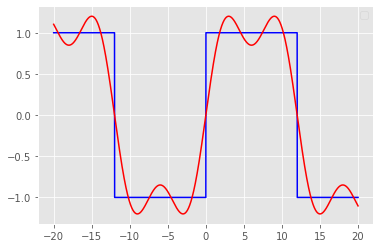

In [3]:
f= generate_sum(5)
plt.plot(x_,y,color="blue")
plt.plot(x_,f,color="red")
# plt.title("Fourier Series approximation number of armonics: "+str(armonics))
plt.legend()
plt.show()

We segregate into a separate function the work that needs to be re-done in response to user input. We'll call the function <b>PlotIt</b>. Note the name of the argument to this function, <b><i>NumHarmonics</i></b>, as this turns up in the widget code.

In [5]:
def plotIt(NumHarmonics):
    generate_sum(NumHarmonics)
    plt.plot(x_,y,color="blue")
    plt.plot(x_,f,color="red")
    # plt.title("Fourier Series approximation number of armonics: "+str(armonics))
    # plt.legend()
    plt.show()

Note that <b>interact( )</b> displays the result of the function call immediately. A closely related function, <b>interactive( )</b> returns an object reference that can be accessed from python code. 

In [6]:
s = widgets.IntSlider(min=1, max=30, step=2, value=1)
# interact(f, NumHarmonics=widgets.IntSlider(min=-10, max=30, step=1, value=10));
test=interact(plotIt, NumHarmonics=s);


interactive(children=(IntSlider(value=1, description='NumHarmonics', max=30, min=1, step=2), Output()), _dom_c…

No handles with labels found to put in legend.


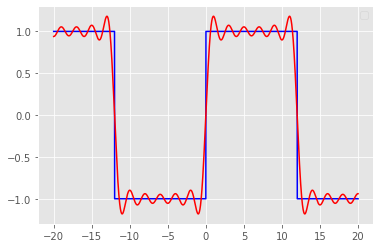